# Homework - Week2 - Ganapathy Raaman Balaji

## Problem 4.1

```
In a recent performance analysis of a fleet of mining trucks, I used GPS data 
(latitude and longitude) recorded by the machine to cluster the turck operating in different fields.
I used this data to summarize truck operation and performance in different mine sites.
The predictors I used were 
GPS coordinates, 
Truck speed, 
engine RPM, 
operation hours and
aftertreatment (emission) performance values.

```

## Problem 4.2

In [20]:
# install.packages("dplyr", repos='http://cran.us.r-project.org')
# install.packages("tidyverse", repos='http://cran.us.r-project.org')
# install.packages("cluster", repos='http://cran.us.r-project.org')
# install.packages("fpc", repos='http://cran.us.r-project.org')
# install.packages("factoextra", repos='http://cran.us.r-project.org')

In [9]:
oldw <- getOption("warn")
options(warn = -1)
library(dplyr)
library(tidyverse)
library(cluster)
library(fpc)
library(factoextra)
require(gridExtra)

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ
Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [10]:
# Read the iris.txt to a dataframe using read.table function. 
# Writing the first four columns (containing the predictors) to a separate dataframe.

df_raw <- read.table("iris.txt", header = TRUE)
df <- df_raw[,1:4]
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


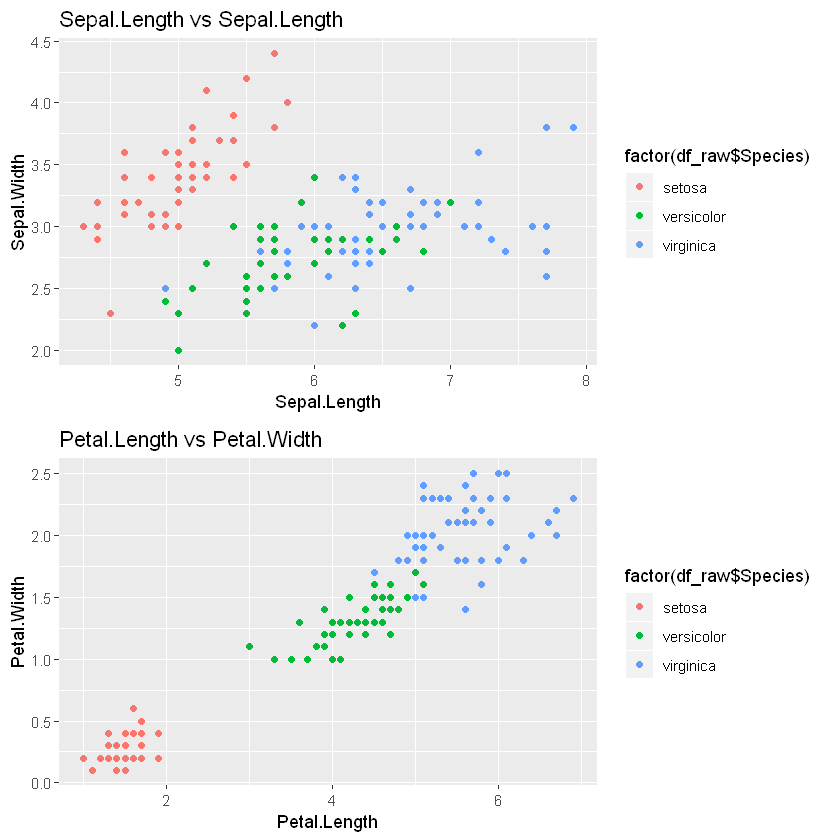

In [11]:
# plotting the petal and sepal features separately to view the different features. This helps understand the distincr feature 
# that will help cluster the data.

library(ggplot2)
plot1 <- ggplot(df, aes(x = df[,1], y = df[,2]))+geom_point(aes(color = factor
                                                    (df_raw$Species)))+labs(x="Sepal.Length", y = "Sepal.Width", 
                                                                         title="Sepal.Length vs Sepal.Length")
plot2 <- ggplot(df, aes(x = df[,3], y = df[,4]))+geom_point(aes(color = factor
                                                    (df_raw$Species)))+labs(x="Petal.Length", y = "Petal.Width", 
                                                                         title="Petal.Length vs Petal.Width")
grid.arrange(plot1, plot2, ncol=1)

# It is clear the petal features can get a better clustering of the iris dataset 

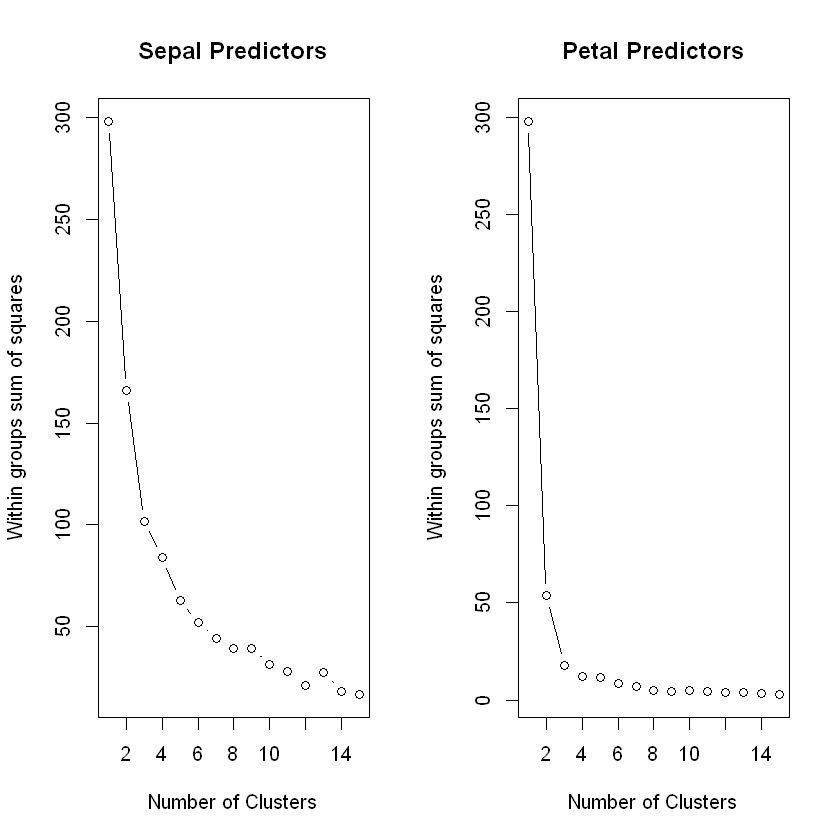

In [12]:
# For the next step, I am going to try to determine the number of clusters using the elbow method. From the previous
# method, I determined that I am going to be using petal features as the input for kmeans method. I am using the elbow 
# method on both the petal and sepal features. 

# FROM THE ELBOW METHOD, I am going to be using 3 clusters as input to kmeans function.

sepals_df = df[,1:2]
petals_df = df[,3:4]

par(mfrow=c(1,2))
sepals_df <- scale(sepals_df)
wss <- (nrow(sepals_df)-1)*sum(apply(sepals_df,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(sepals_df, centers=i)$withinss)
plot1 <- plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares", main="Sepal Predictors")

petals_df <- scale(petals_df)
wss <- (nrow(petals_df)-1)*sum(apply(petals_df,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(petals_df, centers=i)$withinss)
plot2 <- plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares", main="Petal Predictors")


The plot above represents the variance within the clusters. It decreases as k increases, but it can be seen a bend 
(or “elbow”) at k = 3 for the petal predictor. This bend indicates that additional clusters beyond the third have 
little value. In the next section, we’ll classify the observations into 3 clusters.

In [14]:
# kmeans(x, centers, iter.max = 10, nstart = 1, algorithm = c("Hartigan-Wong", "Lloyd", "Forgy", "MacQueen"), trace=FALSE)

set.seed(123)
model <- kmeans(petals_df, 3, nstart = 25, iter.max = 10)

In [15]:
cluster_centroids <- aggregate(petals_df,by=list(model$cluster),FUN=mean)
cluster_centroids

Group.1,Petal.Length,Petal.Width
1,-1.3006301,-1.2507035
2,1.0245672,1.1242119
3,0.3048515,0.1648655


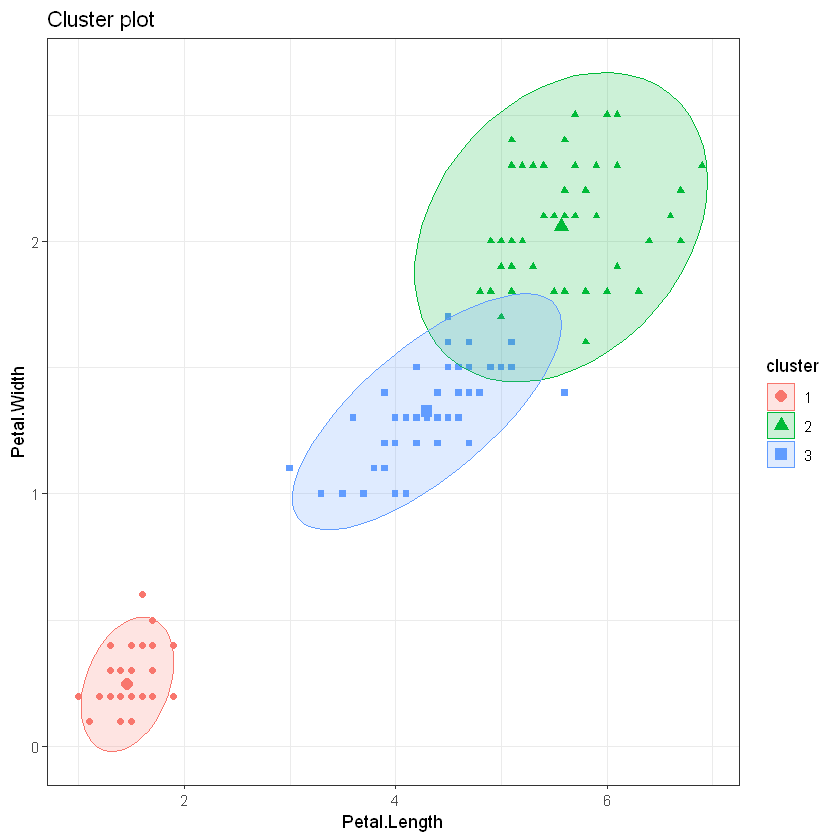

In [16]:
# Plotting the clusters and showing the location of the centroid in the cluster
fviz_cluster(object = model, data = df, geom = "point", choose.vars = c("Petal.Length", "Petal.Width"), 
             stand = FALSE, ellipse.type = "norm") + theme_bw()

## Question 5.1

In [17]:
install.packages("outliers", repos = 'http://cran.us.r-project.org')

package 'outliers' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bgraa\AppData\Local\Temp\Rtmp4cz1Wh\downloaded_packages


In [18]:
library(outliers)
crime_df <- read.table("uscrime.txt", header = TRUE)
head(crime_df, n=3)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578


In [19]:
crime <- crime_df$Crime
grubbs.test(crime, type = 11, opposite = FALSE, two.sided = FALSE)


	Grubbs test for two opposite outliers

data:  crime
G = 4.26880, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


## Problem 6.1

Describe a situation or problem from your job, everyday life, current events, etc., for which a Change Detection model 
would be appropriate. Applying the CUSUM technique, how would you choose the critical value and the threshold?

As a Performance analytics engineer at CAT, I bin the engine and machine performance metrics to view as a 1D histogram or heat maps. To correlate these histograms, I often find time weighted values of key performance indicators. Depending on the importance of the metric, I vary the time window from minutes to days. After tabulating the time weighted values, I compare the values to the threshold to detect failures.

For example, I recently performed fatigue analysis where I had to calculate remaining life of a truck component based on stress-strain values. I chose my critical value based on varying the elastic and plastic constants of the material of  component. The threshold is a million cycles (General rule of thumb when looking at cyclic fatigue life of a material). I identified trucks and instances where the component lasted over the million cycles threshold to summarize optimum performance.


## Problem 6.2 (a)

In this problem, I varied the values of C from 0 through 3, keeping the threshold at 75 degrees Farenheit. I calculated average temperatures of each year. For different values of C, I used CUSUM approach, based on the following equation:

S(t) = max{0, S(t-1)+(mu - x(t) - C)}

to identify the day in each year when temperature (in Farenheit) decreased to unofficially end summer.

From my solution, I plotted the unofficial end of summer day per year for each value of C. October 8 seemed to be the average of all years when summer unofficially ended.

Summer unofficially ended earliest in the year 2000 across all values of C. (for C=0, the minimum day of end of summer was September 17).

The plot corroborates this data. 

## Problem 6.2 (b)

Using CUSUM approach for C=0,1,2,3, the values of temperature seems to rise above threshold of 3 degrees in the year 2011 (and onwards) for C = 0. For C=1,  2012 and 2013 seem to be hotter than the previous years by 3 degrees, but gets cooler from 2014. So, for C=0. Atalanta seems to get warmer from 2011 (the day is September 19 for C=0 - calculated from the previous part of the problem).

The answer seems to complement the average temperature trend plotted in the chart.